# Prediction of Sleep Disorder

**Objective:** The objective of this project is to predict sleep disorders from lifestyle factors and medical variables such as; age, gender, BMI, Blood Pressure, Occupation

### Dataset Overview:
The dataset consists of 374 rows and 13 columns, that covers a wide range of variables related to sleep, cardiovascular health and lifestyle habits. It includes the following details; age, gender, occupation, sleep duration, quality of sleep, physical activity level, stress level, BMI category, blood pressure, heart rate, daily steps and the presence or absence of sleep disorder.

### Key Features of the Dataset:
+ Comprehensive Sleep Metrics: Explore sleep duration, quality and factors influencing sleep patterns.
+ Lifestyle Factors: Analyze physical activity levels, stress levels and BMI categories.
+ Cardiovascular Health: Examine blood pressure and heart rate measurements.
+ Sleep Disorder Analysis: Identify the occurence of sleep disorders such as insomnia and sleep apnea.

### Dataset Information:
+ Person ID: An identifier for each individual.
+ Gender: The gender of the person (Male/Female).
+ Age: The age of the person in years.
+ Occupation: The occupation of the person.
+ Sleep Duration (hours): The number of hours the person sleeps per day.
+ Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1-10.
+ Physical Activity Level(minutes/day): The number of minutes the person engages in physical activity daily.
+ Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1-10.
+ BMI Category: The Body Mass Index category of the person (e.g, underweight, normal, overweight).
+ Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
+ Heart Rate (bpm): The resting heart rate of the person in beats per minute.
+ Daily Steps: The number of steps the person takes per day.
+ Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

### Details about Sleep Disorder Column:
+ None: The individual does not exhibit any specific sleep disorder.
+ Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-sleep quality.
+ Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

# Importing required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing the Dataset

In [180]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Data Science\datasets\Preprocessed\Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
df.shape

(374, 13)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Data Cleaning

In [182]:
# Replace spaces in column names with '_'
df.columns = [col.replace(' ', '_') for col in df.columns]

In [65]:
# Check for missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

The column 'Sleep_Disorder' has 3 categories, None, Sleep Apnea and Insomnia. The catrgory of people with no sleep disorder is treated as NaN so they will be replaced with 'No Disorder'

In [184]:
# Replace NaN values in 'Sleep Disorder' with 'No'
df['Sleep_Disorder'] = df['Sleep_Disorder'].fillna('No Disorder')

In [73]:
# Check the unique values in 'Sleep Disorder'
df['Sleep_Disorder'].value_counts()

Sleep_Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [186]:
# Split the 'Blood_Pressure' into 'Systolic_BP' and 'Diastolic_BP'
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)
df = df.drop(['Blood_Pressure'], axis=1)
df.head()

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [77]:
# Get the unique values in all the columns
df.nunique()

Person_ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep_Duration              27
Quality_of_Sleep             6
Physical_Activity_Level     16
Stress_Level                 6
BMI_Category                 4
Heart_Rate                  19
Daily_Steps                 20
Sleep_Disorder               3
Systolic_BP                 18
Diastolic_BP                17
dtype: int64

In [30]:
# Get the value counts for BMI Category
df['BMI_Category'].value_counts()

BMI_Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [188]:
# Replace 'Normal weight' with 'Normal' in BMI Category
df['BMI_Category'] = df['BMI_Category'].replace('Normal Weight', 'Normal')
df['BMI_Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

# Exploratory Data Analysis

In [190]:
# Split dataset into categorical and numerical data and store in a new dataframe
numerical = ['Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'Heart_Rate', 'Daily_Steps', 'Systolic_BP', 'Diastolic_BP']
categorical = ['Gender', 'Occupation', 'BMI_Category', 'Sleep_Disorder']
df1 = df[numerical + categorical]
df1.head()

,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps,Systolic_BP,Diastolic_BP,Gender,Occupation,BMI_Category,Sleep_Disorder
0,27,6.1,6,42,6,77,4200,126,83,Male,Software Engineer,Overweight,No Disorder
1,28,6.2,6,60,8,75,10000,125,80,Male,Doctor,Normal,No Disorder
2,28,6.2,6,60,8,75,10000,125,80,Male,Doctor,Normal,No Disorder
3,28,5.9,4,30,8,85,3000,140,90,Male,Sales Representative,Obese,Sleep Apnea
4,28,5.9,4,30,8,85,3000,140,90,Male,Sales Representative,Obese,Sleep Apnea


### Distribution of numerical variables

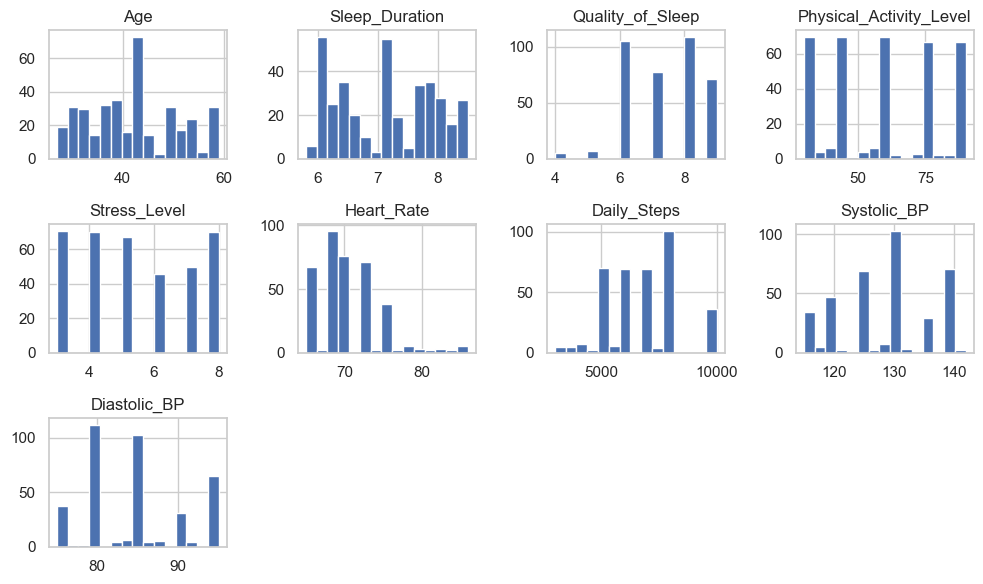

In [192]:
sns.set(style='whitegrid', rc={'figure.figsize':[10,6]})
df1[numerical].hist(bins=15, figsize=(10, 6), layout=(3, 4))

plt.tight_layout()
plt.show()

+ **Age Distribution:** Majority of the population are young and older adults with a higher population in middle aged adults. 
+ **Sleep Duration:** Most of the population have a sleep duration between 6-8 with fewer individuals reporting very short or very long sleep hours. This indicated that majority of the population gets enough sleep per day.
+ **Quality of Sleep:** Most of the population has a higher quality of sleep ranging from 6-8.
+ **Physical Activity Level:** There are distinct groups with different levels of physical activity level.
+ **Stress Level:** The distribution is spread out, with more population with moderate stress levels.
+ **Heart Rate:** Most of the population has a normal heart rate.
+ **Daily Steps:** There is a noticeable peak around 5000-6000 steps.
+ **Blood Pressure:** There is a variability in the distribution of systolic and Diastolic BP among the population, with a peak around 130mmHG for the systolic and 80mm and 85mmHG for the diastolic BP.

### Visualization of Categorical variables

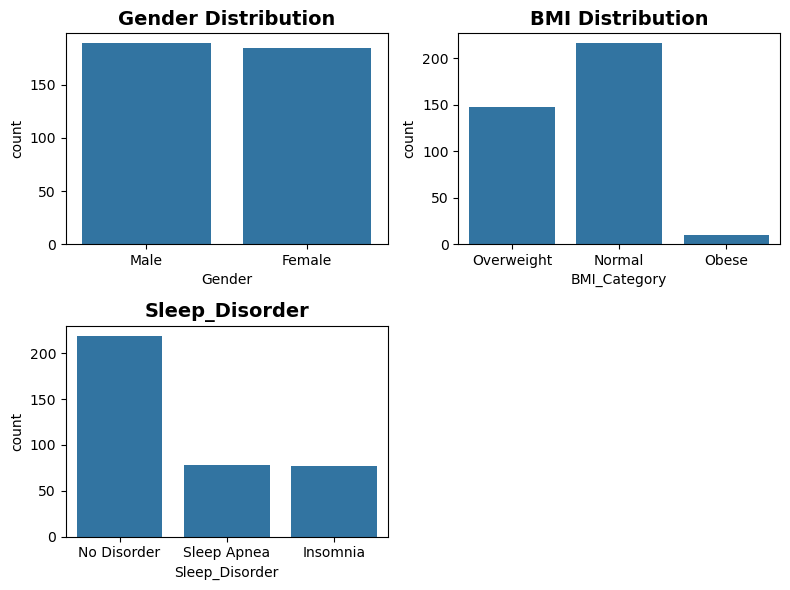

In [38]:
column = ['Gender', 'BMI_Category', 'Sleep_Disorder']

title = ['Gender Distribution', 'BMI Distribution', 'Sleep_Disorder']

fig = plt.figure(figsize=(8, 6))

for i, (col, title) in enumerate(zip(column, title)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='bold', color='black')
    
plt.tight_layout()
plt.show()

+ **Gender Distribution:** There is a slightly equal distribution of both genders with a little increase in the male gender.
+ **BMI Category:** Majority of the population has normal BMI, followed by a larger population who are Overweight and a few individuals who are obese.
+ **Sleep Disorder:** A larger population has no sleep disorder,  and there's an equal distribution of the population of individuals with sleep apnea and insomnia.

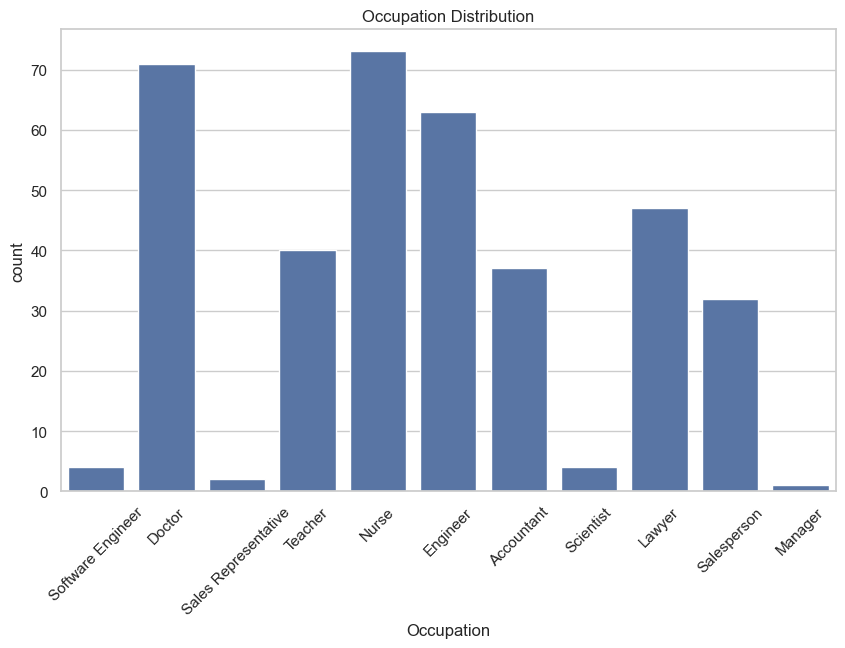

In [85]:
sns.countplot(x='Occupation', data=df)
plt.title('Occupation Distribution')
plt.xticks(rotation=45)

plt.show()

The occupations with the highest population are the Nurses, Doctors and Engineers. 
</br>The occupation with the least population are the Managers, Sales Representatives, Software Engineers and Scientists.

### Lifestyle Factors and Sleep Disorder

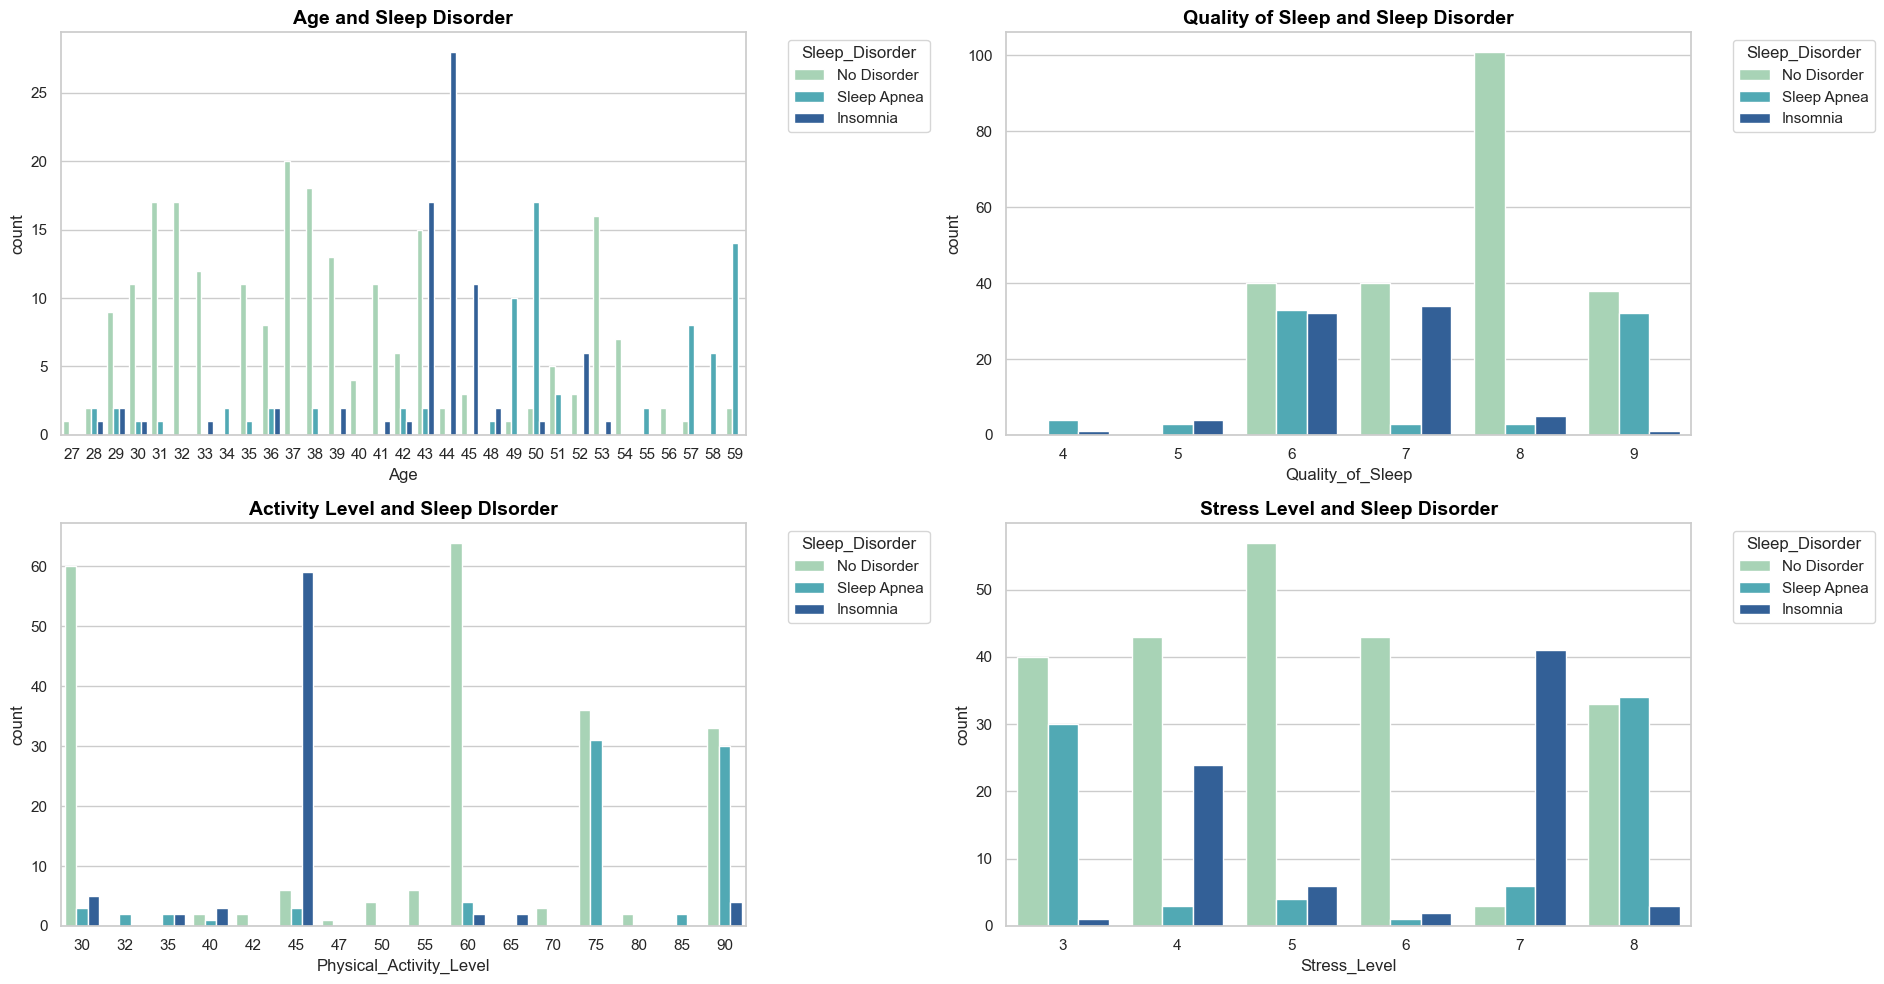

In [194]:
column = ['Age', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level']

title = ['Age and Sleep Disorder', 'Quality of Sleep and Sleep Disorder', 'Activity Level and Sleep DIsorder', 'Stress Level and Sleep Disorder']

order = ['No Disorder', 'Sleep Apnea', 'Insomnia']

sleep_palette = {
    'No Disorder': '#a1dab4',    # light green
    'Sleep Apnea': '#41b6c4',       # mint green
    'Insomnia': '#225ea8'     # dark blue-green
}

fig = plt.figure(figsize=(19, 10))

for i, (col, title) in enumerate(zip(column, title)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, hue='Sleep_Disorder', ax=ax, palette=sleep_palette, hue_order=order)
    ax.set_title(title, fontsize=14, fontweight='bold', color='black')
    ax.legend(title='Sleep_Disorder', frameon=True, shadow=False, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

+ **Age and Sleep Disorder:** Majority of the younger adults don't have any sleep disorder, and there is an equal distribution among those with sleep disorders. Individuals between ages 43-45 suffers from insomnia. Sleep apnea is more prevalent among the older adults.
+ **Quality of Sleep and Sleep Disorder:** Most of the individuals with a very good sleep quality has no sleep disorder, and insomnia has the highest counts at lower counts, 5-7.)
+ **Activity Level and Sleep Disorder:**  Sleep apnea appears more prevalent among populations with higher activity level (75, 90), insomnia has a increase in prevalence with the population with medium activity level(45). No disorder shows peak at certain activity levels, both low, moderate and high.
+ **Stress Level and Sleep Disorder:** Individuals with lower stress levels has lesser prevalence of sleep disorder, indivuals with high stres level suffers from sleep disorders. Sleep apnea appears to have peak in low and high stress levels.

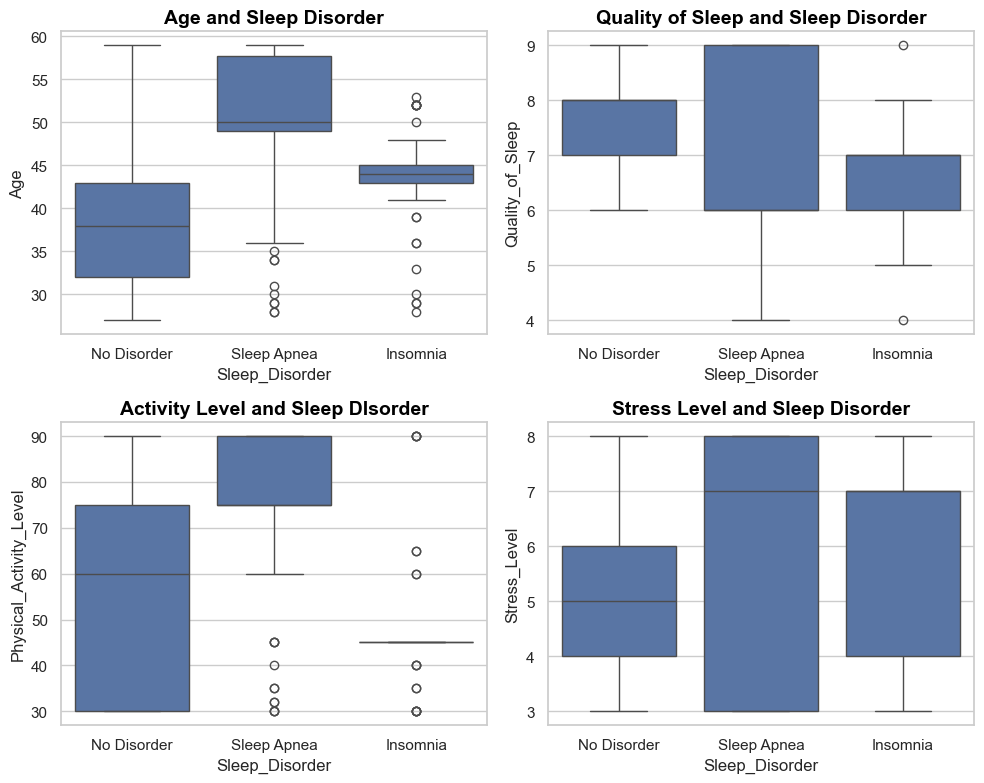

In [167]:
column = ['Age', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level']

title = ['Age and Sleep Disorder', 'Quality of Sleep and Sleep Disorder', 'Activity Level and Sleep DIsorder', 'Stress Level and Sleep Disorder']

fig = plt.figure(figsize=(10, 8))

for i, (col, title) in enumerate(zip(column, title)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.boxplot(data=df, x='Sleep_Disorder', y=col, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

#### Cardiovascular Function and Sleep Disorder

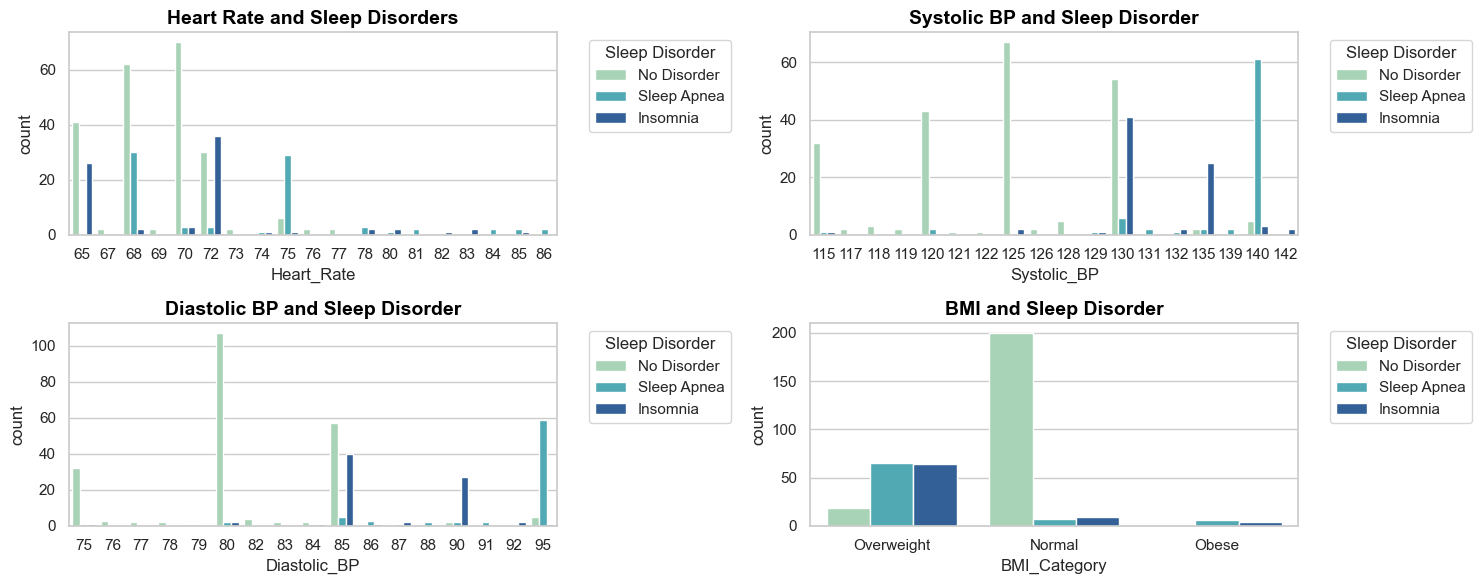

In [196]:
columns = ['Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'BMI_Category']

titles = ['Heart Rate and Sleep Disorders', 'Systolic BP and Sleep Disorder', 'Diastolic BP and Sleep Disorder', 'BMI and Sleep Disorder']

order = ['No Disorder', 'Sleep Apnea', 'Insomnia']

order_palette = {
    'No Disorder': '#a1dab4',    # light green
    'Sleep Apnea': '#41b6c4',       # mint green
    'Insomnia': '#225ea8'     # dark blue-green
}

fig = plt.figure(figsize=(15, 6))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, hue='Sleep_Disorder',  hue_order=order, ax=ax, palette=order_palette)
    ax.set_title(title, fontsize=14, fontweight='bold', color='black')
    ax.legend(title='Sleep Disorder', frameon=True, shadow=False, bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.xticks(rotation=45)
plt.savefig(r"C:\Users\Admin\Documents\Data Science\Images\Cardiovascular-Functions-vs-Sleep-Disorders", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

+ **Heart Rate and Sleep Disorder:** Most individuals with normal heart rate has no sleep disorder, but there's a signigicant population of people with insomnia and sleep apnea.
+ **Blood Pressure:** Individuals with high blood pressure (systolic and siastolic) suffers from sleep disorders. Most of the individuals with normal blood pressure has no sleep disorder.
+ **BMI and Sleep Disorder:** Most individuals with normal BMI has no sleep disorder. Sleep disorder is more prevalent among overweight and obese individuals.

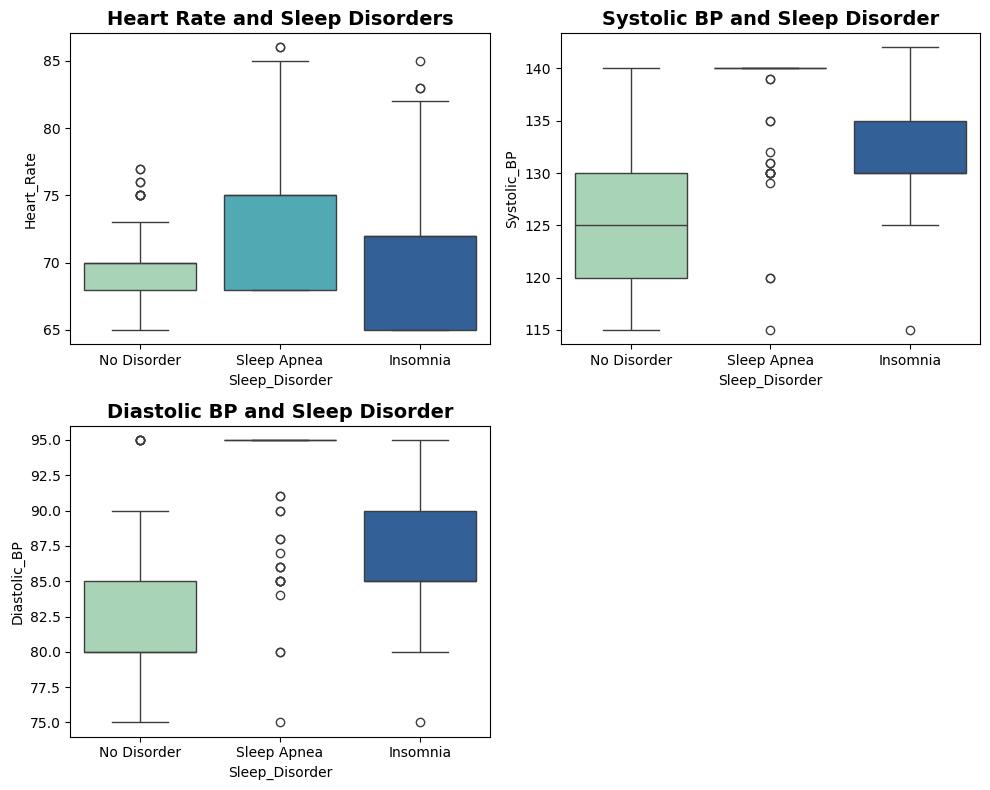

In [150]:
columns = ['Heart_Rate', 'Systolic_BP', 'Diastolic_BP']

titles = ['Heart Rate and Sleep Disorders', 'Systolic BP and Sleep Disorder', 'Diastolic BP and Sleep Disorder']

order = ['No Disorder', 'Sleep Apnea', 'Insomnia']

order_palette = {
    'No Disorder': '#a1dab4',    # light green
    'Sleep Apnea': '#41b6c4',       # mint green
    'Insomnia': '#225ea8'     # dark blue-green
}

fig = plt.figure(figsize=(10, 8))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.boxplot(data=df, x='Sleep_Disorder',  y=col, ax=ax, palette=order_palette)
    ax.set_title(title, fontsize=14, fontweight='bold', color='black')
   
plt.tight_layout()
plt.show()

#### Demographics and Sleep Disorder

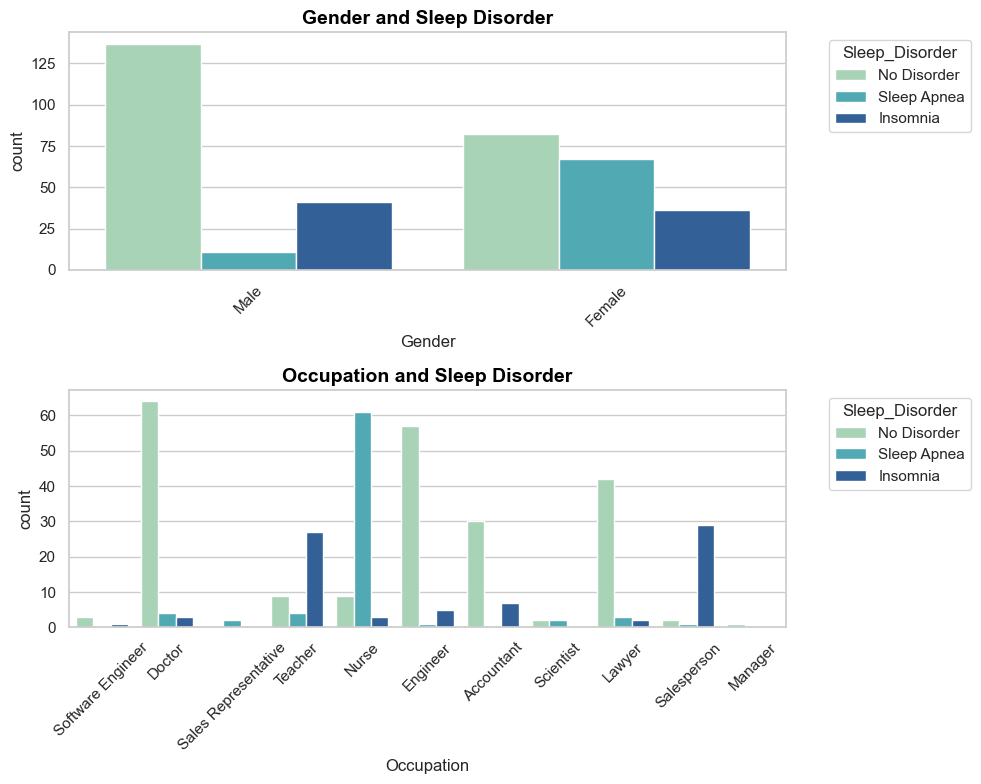

In [198]:
columns = ['Gender', 'Occupation']

titles = ['Gender and Sleep Disorder', 'Occupation and Sleep Disorder']

order = ['No Disorder', 'Sleep Apnea', 'Insomnia']

order_palette = {
    'No Disorder': '#a1dab4',    # light green
    'Sleep Apnea': '#41b6c4',       # mint green
    'Insomnia': '#225ea8'     # dark blue-green
}

fig = plt.figure(figsize=(10, 8))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = fig.add_subplot(2, 1, i+1)
    sns.countplot(data=df, x=col, hue='Sleep_Disorder', hue_order=order, ax=ax, palette=order_palette)
    ax.set_title(title, fontsize=14, fontweight='bold', color='black')
    ax.legend(title='Sleep_Disorder', frameon=True, shadow=False, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
plt.savefig(r"C:\Users\Admin\Documents\Data Science\Images\Occupation-and-Sleep-Disorders", dpi=300, bbox_inches='tight')   
plt.tight_layout()
plt.show()

+ **Gender and Sleep Disorder:** Most of the males has no sleep disorder, sleep apnea and insomnia are more prevalent in the females.
+ **Occupation:** Most of the nurses suffer from sleep apnea, insomnia has the highest population among Salespersons and teachers. Most doctors, engineers, accountants and lawyers do not have insomnia.

# Data Preprocessing

In [40]:
df1[categorical].nunique()

Gender             2
Occupation        11
BMI_Category       3
Sleep_Disorder     3
dtype: int64

In [42]:
print(df['Gender'].value_counts())
print('\n')
print(df['Sleep_Disorder'].value_counts())
print('\n')
print(df['BMI_Category'].value_counts())

Gender
Male      189
Female    185
Name: count, dtype: int64


Sleep_Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


BMI_Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64


In [44]:
# Apply mappings for ordinal data
mappings = {
    'Gender': {'Male': 0, 'Female': 1},
    'BMI_Category': {'Normal': 0, 'Overweight': 1, 'Obese': 2},
    'Sleep_Disorder': {'No Disorder': 0, 'Sleep Apnea': 1, 'Insomnia': 2}
}

df.replace(mappings, inplace=True)

# # Use one hot encoding for nominal data 'Occupation'
encoder = OneHotEncoder(sparse_output=False, drop='first')

df_encoded =encoder.fit_transform(df[['Occupation']])

encoded_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(['Occupation']))

df_new = df.drop(columns=['Occupation']).join(encoded_df)

df_new

,Person_ID,Gender,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,0,27,6.1,6,42,6,1,77,4200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,28,6.2,6,60,8,0,75,10000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,28,6.2,6,60,8,0,75,10000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,28,5.9,4,30,8,2,85,3000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0,28,5.9,4,30,8,2,85,3000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,8.1,9,75,3,1,68,7000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
370,371,1,59,8.0,9,75,3,1,68,7000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
371,372,1,59,8.1,9,75,3,1,68,7000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
372,373,1,59,8.1,9,75,3,1,68,7000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Visualize direction of Relationship Between Variables

#### Cardiovascular Functions and Sleep Disorders

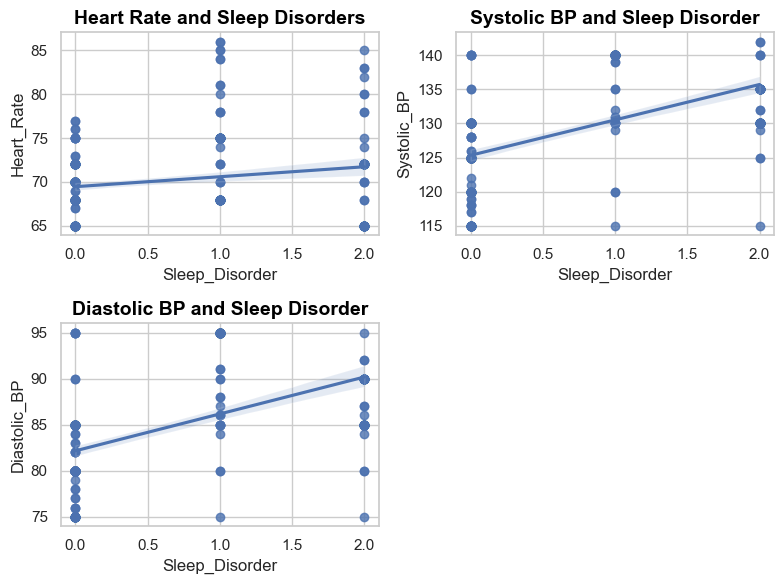

In [195]:
columns = ['Heart_Rate', 'Systolic_BP', 'Diastolic_BP']

titles = ['Heart Rate and Sleep Disorders', 'Systolic BP and Sleep Disorder', 'Diastolic BP and Sleep Disorder']

order = ['No Disorder', 'Sleep Apnea', 'Insomnia']

order_palette = {
    'No Disorder': '#a1dab4',    # light green
    'Sleep Apnea': '#41b6c4',       # mint green
    'Insomnia': '#225ea8'     # dark blue-green
}

fig = plt.figure(figsize=(8, 6))

for i, (col, title) in enumerate(zip(columns, titles)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.regplot(data=df, x='Sleep_Disorder',  y=col, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='bold', color='black')
   
plt.tight_layout()
plt.show()

The relationship between cardiovascular function and sleep disorder is non-linear. 

#### Lifestyle and Sleep Disorder

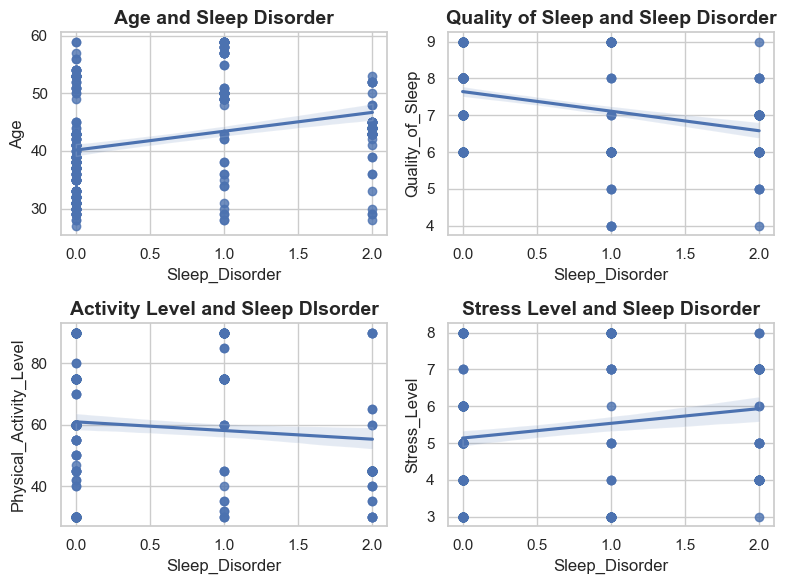

In [183]:
column = ['Age', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level']

title = ['Age and Sleep Disorder', 'Quality of Sleep and Sleep Disorder', 'Activity Level and Sleep DIsorder', 'Stress Level and Sleep Disorder']

fig = plt.figure(figsize=(8, 6))

for i, (col, title) in enumerate(zip(column, title)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.regplot(data=df, x='Sleep_Disorder', y=col, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

The relationship between age, sleep quality and stress level and sleep disorder is non-linear.

#### Heat map correlation

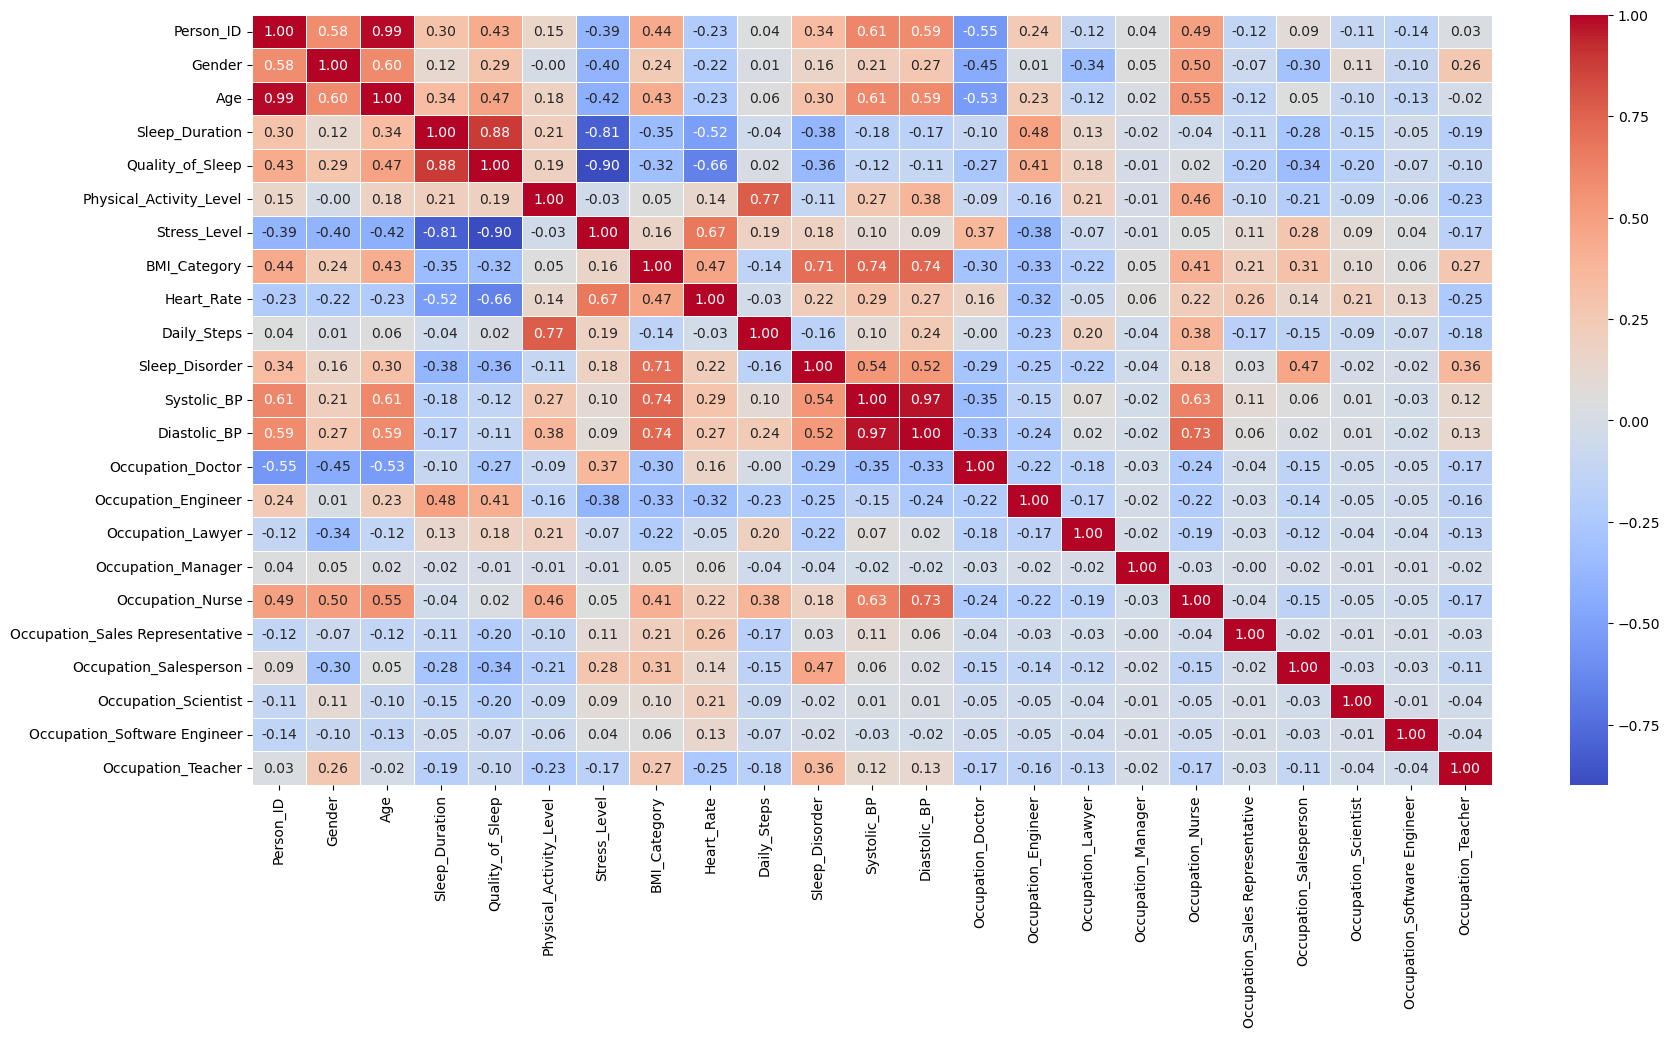

In [46]:
corr = df_new.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

From this plot, we can deduce the following correlation between the features
+ **BMI Category and Blood Pressure** are strongly correlated with a correlation value of 0.74. This is because an increased BMI means excess weight which strains the cardiovascular system.
+ **BMI Category and Sleep Disorder** are strongly correlated with a correlation value of 0.71. This is because excessive body weight can negatively affect sleep. The strongest link is Obstructive Sleep Apnea, excess fat, especially around the neck can narrow the airway, causing breathing interruptions during sleep.
+ **Age and Blood Pressure** are strongly correlated with an average correlation value of 0.6. This is because high blood pressure is more prevalent among older individuals, due to a decline in cardiovascular function as a person's age progresses.
+ **Nursing Occupation and Blood Pressure** are strongly correlated with an average value of 0.68. This could be due to the high stress levels and poor sleep that nurses experience.

# Model Development

The models that will be used are;
+ Random Forest
+ Decision Trees
+ Extra Trees
+ Support Vector Classifier
The model with the overall best performance will be picked.
</br>
</br>
The performance matrix that will be used to evaluate the model's performance are;
+ Accuracy score
+ Precision
+ Recall
+ F1 score
+ Confusion matrix
+ Classification report

#### Feature Selection

In [48]:
X = df_new.drop(['Sleep_Disorder', 'Person_ID'], axis=1)
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

y = df_new['Sleep_Disorder']

##### Split into Training ad Testing Datasets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
# Function to print model performance and plot confusion matrix

def print_model_performance(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score: {:.3f}'.format(accuracy))

    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: {:.3f}'.format(precision))

    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: {:.3f}'.format(recall))

    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1 Score: {:.3f}'.format(f1))

    print('Classification Report')
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d')
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [54]:
# Function to perform Cross Validation
def model_cross_validation(model):
    from sklearn.model_selection import cross_val_score, StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(score)

    mean = score.mean()
    std = score.std()
    print('Average: {:.3f}'.format(mean))
    print('Standard Deviation: {:.3f}'.format(std))

### Random Forest Classifier

Accuracy Score: 0.867
Precision: 0.872
Recall: 0.867
F1 Score: 0.858
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.90      0.56      0.69        16
           2       0.93      0.87      0.90        15

    accuracy                           0.87        75
   macro avg       0.89      0.80      0.83        75
weighted avg       0.87      0.87      0.86        75



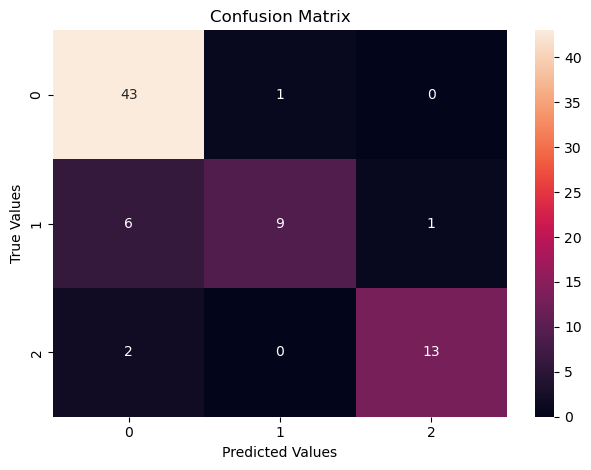

In [56]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print_model_performance(y_test, rf_pred)

In [66]:
model_cross_validation(rf)

[0.93333333 0.94666667 0.85333333 0.86666667 0.93243243]
Average: 0.906
Standard Deviation: 0.039


The model has a high accuracy score of 86.7%, however, from the classification report, it can be deduced that though the precision, recall and f1 scores are high, the recall and f1 score for Class 1 (Sleep Apnea) are very low when compared to the precision score.

### Decision Tree Classifier

Accuracy Score: 0.787
Precision: 0.794
Recall: 0.787
F1 Score: 0.783
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
           1       0.82      0.56      0.67        16
           2       0.68      0.87      0.76        15

    accuracy                           0.79        75
   macro avg       0.77      0.76      0.75        75
weighted avg       0.79      0.79      0.78        75



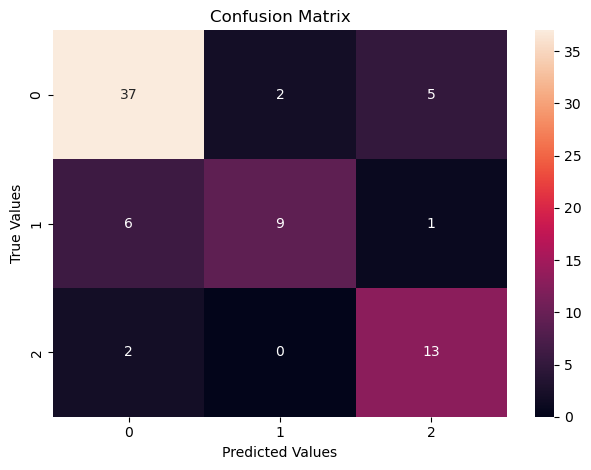

In [58]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print_model_performance(y_test, dt_pred)

In [68]:
# Cross Validation
model_cross_validation(dt)

[0.89333333 0.89333333 0.82666667 0.81333333 0.91891892]
Average: 0.869
Standard Deviation: 0.041


This model performs less better than Random Forest with an accuracy score of 78.7%. From the classification report, we can see that this model also struggles to accurately predict Class 1(Sleep Apnea.

### Extra Trees

Accuracy Score: 0.800
Precision: 0.795
Recall: 0.800
F1 Score: 0.796
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        44
           1       0.69      0.56      0.62        16
           2       0.81      0.87      0.84        15

    accuracy                           0.80        75
   macro avg       0.78      0.76      0.77        75
weighted avg       0.79      0.80      0.80        75



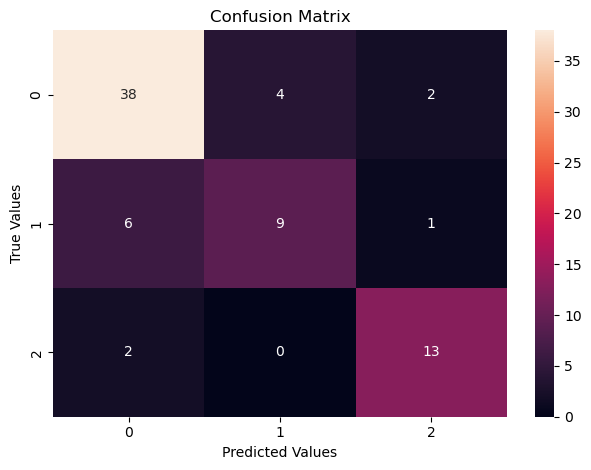

In [62]:
et = ExtraTreeClassifier(class_weight='balanced', random_state=42)
et.fit(X_train, y_train)
et_pred = et.predict(X_test)

print_model_performance(y_test, et_pred)

In [64]:
# Cross Validation
model_cross_validation(et)

[0.92       0.89333333 0.82666667 0.84       0.89189189]
Average: 0.874
Standard Deviation: 0.035


This model performs better than Decision Trees but also less than Random Forest with an accuracy score of 80.0%. From the classification report, we can see that this model also struggles to accurately predict Class 1(Sleep Apnea). The precision, recall and f1 score are quite low.

### Support Vector Classifier

Accuracy Score: 0.867
Precision: 0.869
Recall: 0.867
F1 Score: 0.867
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.76      0.81      0.79        16
           2       0.87      0.87      0.87        15

    accuracy                           0.87        75
   macro avg       0.85      0.86      0.85        75
weighted avg       0.87      0.87      0.87        75



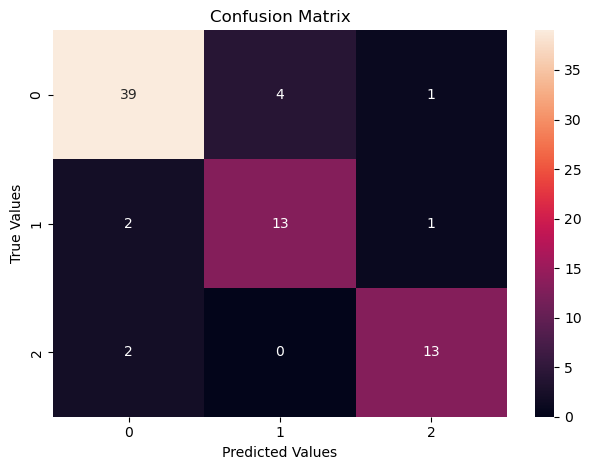

In [70]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced', kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print_model_performance(y_test, svc_pred)

In [72]:
model_cross_validation(svc)

[0.94666667 0.92       0.89333333 0.82666667 0.87837838]
Average: 0.893
Standard Deviation: 0.041


This model performs better than the other models with an accuracy score of 86.7%. Though Random Forest and Support Vector Classifier has the same accuracy score, SVC is the preffered model of choice because the classification report shows that this model significantly predicts Class 1 (Sleep Apnea) well with a recall of 0.81.

## Feature Importance

                           Features  Importances
10                     Diastolic_BP     0.139147
6                      BMI_Category     0.125093
2                    Sleep_Duration     0.118768
1                               Age     0.114917
9                       Systolic_BP     0.104051
4           Physical_Activity_Level     0.083608
15                 Occupation_Nurse     0.078606
8                       Daily_Steps     0.064286
7                        Heart_Rate     0.047490
3                  Quality_of_Sleep     0.041358
5                      Stress_Level     0.031980
0                            Gender     0.009148
11                Occupation_Doctor     0.007456
16  Occupation_Sales Representative     0.007217
17           Occupation_Salesperson     0.006582
13                Occupation_Lawyer     0.005846
12              Occupation_Engineer     0.004613
20               Occupation_Teacher     0.004382
19     Occupation_Software Engineer     0.004026
18             Occup

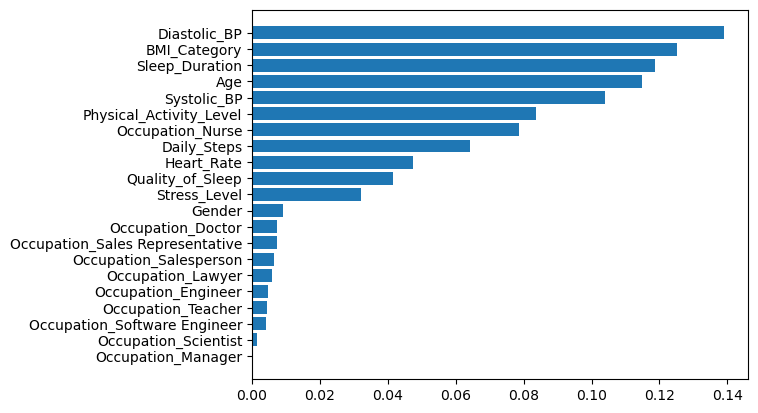

In [74]:
importance = rf.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Features': feature_names, 'Importances': importance})
feature_importance = feature_df.sort_values(by='Importances', ascending=True)

print(feature_importance.sort_values(by='Importances', ascending=False))

# Plot the feature importance
plt.figsize=(10, 9)
plt.barh(feature_importance['Features'], feature_importance['Importances'])
plt.show()

The top 12 most important features will be picked and used to retrain the model

#### Feature Selection

In [76]:
# Define the X and y variables
X_new = df_new[['Systolic_BP', 'BMI_Category', 'Diastolic_BP', 'Age', 'Sleep_Duration', 'Daily_Steps', 'Physical_Activity_Level', 'Heart_Rate', 'Occupation_Nurse', 'Quality_of_Sleep', 'Stress_Level', 'Gender']]
X_new_scaled = StandardScaler().fit_transform(X_new)
X_new = pd.DataFrame(X_new_scaled, columns=X_new.columns)

y = df_new['Sleep_Disorder']

# Split into Training and Testing Data
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)

### Feature Importance - Random Forest

Accuracy Score: 0.867
Precision: 0.872
Recall: 0.867
F1 Score: 0.858
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.90      0.56      0.69        16
           2       0.93      0.87      0.90        15

    accuracy                           0.87        75
   macro avg       0.89      0.80      0.83        75
weighted avg       0.87      0.87      0.86        75



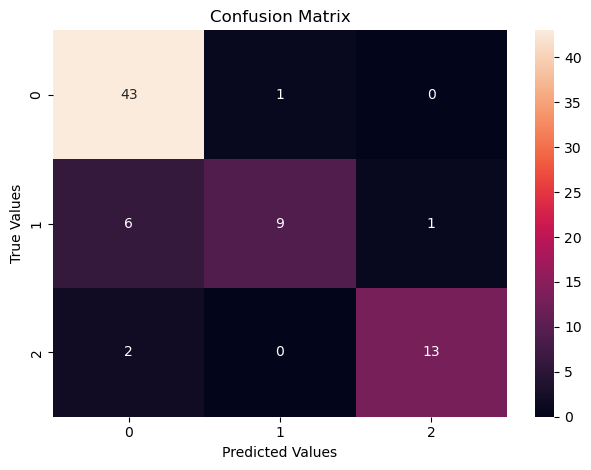

In [78]:
rf1 = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf1.fit(X_new_train, y_new_train)
rf1_pred = rf1.predict(X_new_test)

print_model_performance(y_new_test, rf1_pred)

In [80]:
model_cross_validation(rf1)

[0.93333333 0.94666667 0.85333333 0.86666667 0.93243243]
Average: 0.906
Standard Deviation: 0.039


Even after feature selection, this model still struggles with accurately predicting Class 1(Sleep Apnea) with a recall value of 0.56.

### Feature Importance - Decision Trees

Accuracy Score: 0.800
Precision: 0.804
Recall: 0.800
F1 Score: 0.795
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        44
           1       0.82      0.56      0.67        16
           2       0.72      0.87      0.79        15

    accuracy                           0.80        75
   macro avg       0.79      0.76      0.77        75
weighted avg       0.80      0.80      0.80        75



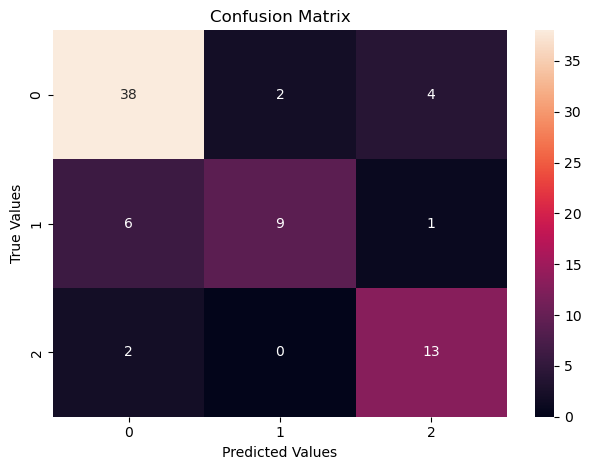

In [82]:
dt1 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt1.fit(X_new_train, y_new_train)
dt1_pred = dt1.predict(X_new_test)

print_model_performance(y_new_test, dt1_pred)

In [84]:
model_cross_validation(dt1)

[0.89333333 0.89333333 0.82666667 0.81333333 0.91891892]
Average: 0.869
Standard Deviation: 0.041


It still struggles with Class 1(Sleep Apnea) with a recall value of 0.56

### Feature Importance - Extra Trees

Accuracy Score: 0.733
Precision: 0.739
Recall: 0.733
F1 Score: 0.732
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.75      0.78        44
           1       0.64      0.56      0.60        16
           2       0.65      0.87      0.74        15

    accuracy                           0.73        75
   macro avg       0.70      0.73      0.71        75
weighted avg       0.74      0.73      0.73        75



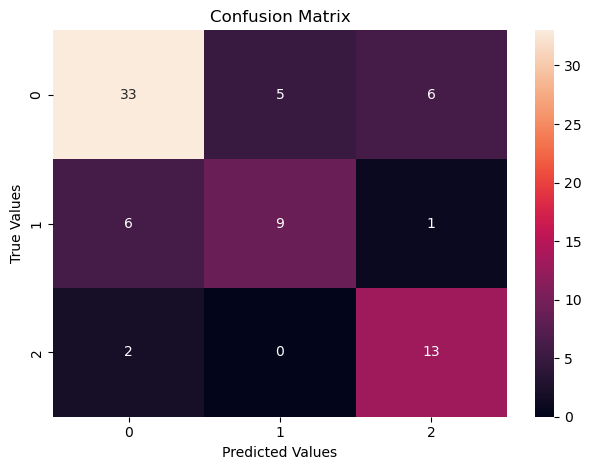

In [86]:
et1 = ExtraTreeClassifier(class_weight='balanced', random_state=42)
et1.fit(X_new_train, y_new_train)
et1_pred = et1.predict(X_new_test)

print_model_performance(y_new_test, et1_pred)

In [88]:
model_cross_validation(et1)

[0.92       0.89333333 0.82666667 0.84       0.89189189]
Average: 0.874
Standard Deviation: 0.035


It still struggles with Class 1(Sleep Apnea) with a recall value of 0.56

### Feature Importance - Support Vector Classifier

Accuracy Score: 0.867
Precision: 0.868
Recall: 0.867
F1 Score: 0.867
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.81      0.81      0.81        16
           2       0.81      0.87      0.84        15

    accuracy                           0.87        75
   macro avg       0.84      0.86      0.85        75
weighted avg       0.87      0.87      0.87        75



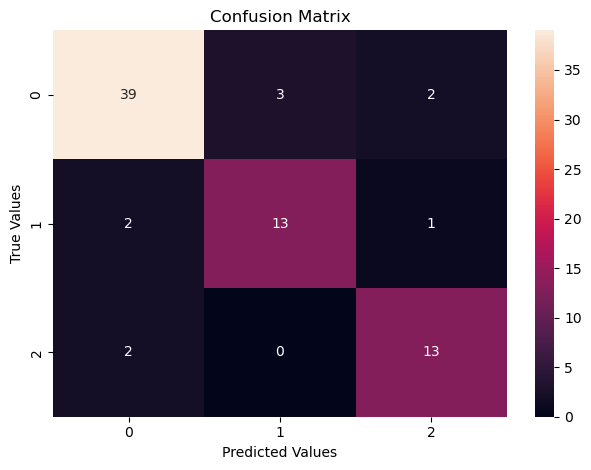

In [90]:
svc1 = SVC(class_weight='balanced', kernel='rbf', random_state=42)
svc1.fit(X_new_train, y_new_train)
svc1_pred = svc1.predict(X_new_test)

print_model_performance(y_new_test, svc1_pred)

In [92]:
model_cross_validation(svc1)

[0.94666667 0.92       0.89333333 0.82666667 0.87837838]
Average: 0.893
Standard Deviation: 0.041


This model has the best performance with an accuracy of 86.7%. The precision and recall has also significantly improved for Class 1 (Sleep Apnea) with feature selection.

# Conclusion

From this analysis, the major determinants of sleep disorders are age, BMI, stress level, Activity level and occupation.
+ **Age:** Sleep apnea is more prevalent among older adults
+ **Activity Level:** Sleep apnea was seen more in individuals with higher activity levels
+ **Stress Level:** Sleep apnea and insomnia were predominantly high in individuals with high stress level
+ **BMI:** Sleep apnea and insomnia were seen more in individuals who are overweight and obese
+ **Occupation:** Sleep apnea ad insomnia were seen more in nurses, teachers and salespersons.
</br>
</br>
From the model development and evaluation, two of the models had the best accuracy score and classification report;
</br>
##### Random Forest
+ Accuracy score: 0.867
+ Precision: 0.872
+ Recall: 0.867
+ F1 score: 0.858
+ CV mean: 0.906
+ SV std: 0.039
</br>
</br>
##### Support Vector Classifier
+ Accuracy score: 0.867
+ Precision: 0.868
+ Recall: 0.867
+ F1 score: 0.867
+ CV mean: 0.893
+ SV std: 0.041
</br>
However, while these two models have very similar performance, a major difference between both is that SVC performs significantly better in predicting Class 1 (Sleep Apnea) with a precision and recall score of 0.81. Random Forest on the other hand performas poorly in predicting Class 1 (Sleep Apnea) with a precision and recall scores of 0.90 and 0.56 respectively.
</br>SVC's cross validation mean is also closer to it's accuracy score than RF's own.
</br>As a result of all these, Support Vector Classifier is the best model of choice!

### Visualization of Actual vs Predicted Values for the Model of Choice

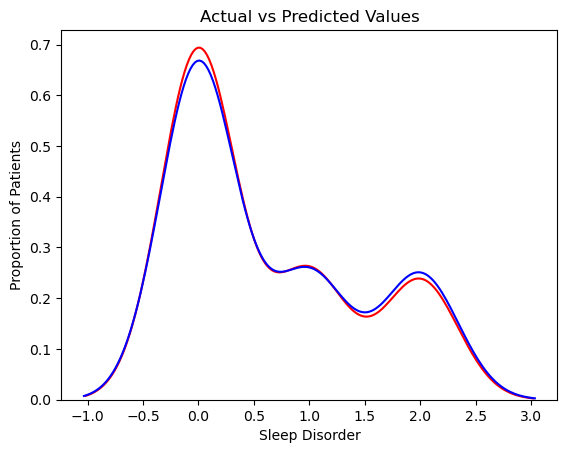

In [176]:
ax = sns.kdeplot(y_new_test, color='r', label='Actual Value')
sns.kdeplot(svc1_pred, color='b', label='Predicted Value', ax=ax)
plt.title('Actual vs Predicted Values')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')

plt.show()